####**REYES STEM - Simulate a reinforcement learning agent taking safe actions based on risk levels**

**Reinforcement Learning for Risk Based Decision Making**

In [17]:
#Importing the modules
import numpy as np
import gym
from gym import spaces
import random
import matplotlib.pyplot as plt

In [14]:
# Create custom environment
class SpaceMissionEnv(gym.Env):
    def __init__(self):
        super(SpaceMissionEnv, self).__init__()
        self.action_space = spaces.Discrete(3)  # 0: Proceed, 1: Wait, 2: Abort
        self.observation_space = spaces.Discrete(3)  # 0: Low, 1: Medium, 2: High risk
        self.state = None
        self.episode_length = 10
        self.step_count = 0

    def reset(self):
        self.state = np.random.choice([0, 1, 2])  # Random risk level
        self.step_count = 0
        return self.state

    def step(self, action):
        done = False
        self.step_count += 1
        reward = self._get_reward(self.state, action)

        # Simulate next state
        self.state = np.random.choice([0, 1, 2])

        if self.step_count >= self.episode_length:
            done = True

        return self.state, reward, done, {}

    def _get_reward(self, risk_level, action):
        # Define safe action mapping
        if risk_level == 0:  # Low Risk
            if action == 0:  # Proceed
                return 10
            elif action == 1:  # Wait
                return 5
            else:  # Abort
                return -1
        elif risk_level == 1:  # Medium Risk
            if action == 0:
                return -5
            elif action == 1:
                return 7
            else:
                return 2
        elif risk_level == 2:  # High Risk
            if action == 0:
                return -20
            elif action == 1:
                return 0
            else:
                return 10

    def render(self, mode='human'):
        print(f"Risk level: {self.state}")


In [15]:
# Q-Learning Implementation
env = SpaceMissionEnv()
q_table = np.zeros((env.observation_space.n, env.action_space.n))

# Hyperparameters
alpha = 0.1      # Learning rate
gamma = 0.9      # Discount factor
epsilon = 0.1    # Exploration rate
episodes = 1000

reward_log = []

for ep in range(episodes):
    state = env.reset()
    total_reward = 0

    done = False
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state])  # Exploit

        next_state, reward, done, _ = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        # Q-learning update
        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        q_table[state, action] = new_value

        state = next_state
        total_reward += reward

    reward_log.append(total_reward)

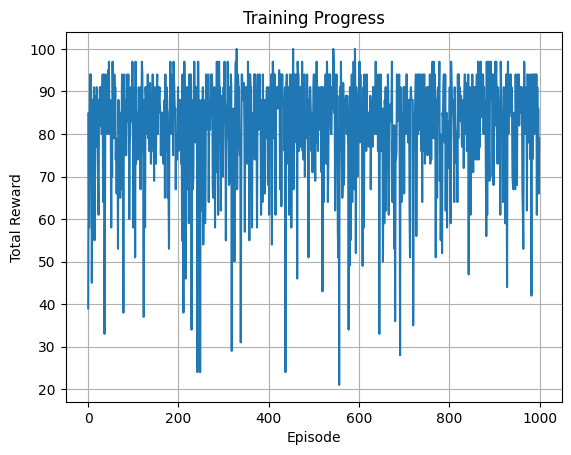

Learned Q-table:
[[90.91433897 85.55060488 79.94748494]
 [75.96111354 88.05001598 83.01427942]
 [60.90875985 81.73979109 91.404466  ]]


In [16]:
# Plot rewards
plt.plot(reward_log)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Progress")
plt.grid()
plt.show()

# Display Q-table
print("Learned Q-table:")
print(q_table)

**Analysis : Q Table Intrepretation**

Each row = risk level

Each column = action

| Risk Level | Action 0 (Proceed) | Action 1 (Wait) | Action 2 (Abort) | Recommended Safe Action |
| ---------- | ------------------ | --------------- | ---------------- | ----------------------- |
| 0 (Low)    | **90.91**          | 85.55           | 79.95            |  **Proceed** (0)       |
| 1 (Medium) | 75.96              | **88.05**       | 83.01            | **Wait** (1)          |
| 2 (High)   | 60.91              | 81.74           | **91.40**        | **Abort** (2)         |
